# Basics of random matrix theory

In this notebook I gather some of the results I mentioned in the first lecture about random matrices. Please feel free to modify the code, try other values of the paramteres, etc to get a feel about the results. 

## Wigner's semicircle law

Wigner's theorem says that the histogram of the eigenvalues of a random matrix (properly scaled) looks like a semicircle, see https://en.wikipedia.org/wiki/Random_matrix#Gaussian_ensembles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function for the semicircle density
def semicircle_density(x):
    # The density is defined on [-2, 2]
    density = (1 / (2 * np.pi)) * np.sqrt(np.clip(4 - x**2, 0, None))
    return density

In [13]:
# Matrix size
d = 1000

# Generate a random real Gaussian matrix
A = np.random.randn(d, d)
# Make the matrix symmetric (GOE) and scale by 1/sqrt(N)
A = (A + A.T) / np.sqrt(2*d)

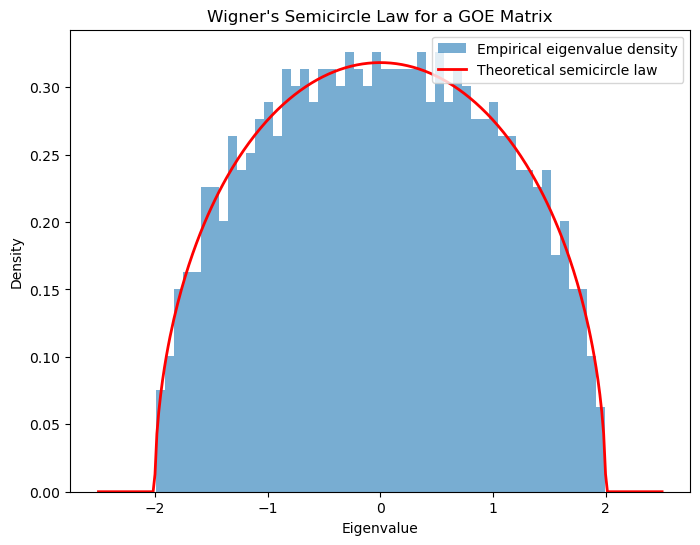

In [14]:
# Compute eigenvalues (they are all real for a Hermitian matrix)
eigvals = np.linalg.eigvalsh(A)

# Create a histogram of the eigenvalues
plt.figure(figsize=(8,6))
plt.hist(eigvals, bins=50, density=True, alpha=0.6, label='Empirical eigenvalue density')

# Generate x-values for the theoretical semicircle density curve
x = np.linspace(-2.5, 2.5, 300)
plt.plot(x, semicircle_density(x), 'r-', linewidth=2, label='Theoretical semicircle law')

plt.xlabel("Eigenvalue")
plt.ylabel("Density")
plt.title("Wigner's Semicircle Law for a GOE Matrix")
plt.legend()
plt.show()

We see that the histogram (of the eigenvalues of *one* random matrix, no averaging going on here) mathces quite well the theoretical red curve. Moreover, the larges eigenvalue is not far from 2.

In [15]:
max(eigvals)

1.9963018327643054

## BBP phase transition

The BBP phase transition, named after Baik, Ben Arous, and Péché, describes a critical phenomenon in random matrix theory when a rank-one signal is embedded into a Gaussian Orthogonal Ensemble (GOE) noise matrix. In this model, the signal’s strength determines whether the top eigenvalue separates from the “bulk” spectrum of noise. When the signal is below a specific threshold, the noise dominates and the largest eigenvalue remains within the bulk, making the signal statistically undetectable. However, once the signal strength exceeds this critical threshold, the top eigenvalue “pops out” as an outlier, and the corresponding eigenvector begins to align with the direction of the true signal, thus enabling reliable detection.

Here's the original paper: https://projecteuclid.org/journals/annals-of-probability/volume-33/issue-5/Phase-transition-of-the-largest-eigenvalue-for-nonnull-complex-sample/10.1214/009117905000000233.full

As before, we shart by generating a random symmetric Gaussian matrix (GOE)

In [17]:
def generate_goe(n):
    """
    Generate an n x n GOE matrix.
    Each entry is drawn from a normal distribution, and the matrix is symmetrized.
    """
    A = np.random.randn(n, n)
    # Symmetrize and scale: note that scaling can be adjusted to match desired spectrum.
    goe = (A + A.T) / np.sqrt(2*n)
    return goe

The model we conside is signal (theta * rank-one projection) + noise (goe). We choose the signal (vector v) to be random here.

In [20]:
def generate_spiked_matrix(n, theta):
    """
    Generate a spiked matrix: rank-one signal + GOE noise.
    theta: signal strength
    """
    # Generate a random unit vector for the rank-one signal
    v = np.random.randn(n)
    v = v / np.linalg.norm(v)
    # Rank-one signal matrix: outer product v v^T scaled by theta
    signal = theta * np.outer(v, v)
    
    # GOE noise
    noise = generate_goe(n)
    
    # Spiked matrix: signal + noise
    return signal + noise

Code to plot the eigenvalues, focusing on the largest one. 

In [21]:
def plot_eigenvalue_distribution(n, theta, bins=50):
    """
    Plot the eigenvalue distribution for the spiked matrix.
    Also mark the largest eigenvalue.
    """
    M = generate_spiked_matrix(n, theta)
    eigenvalues = np.linalg.eigvalsh(M)
    
    # Compute histogram
    plt.hist(eigenvalues, bins=bins, density=True, alpha=0.7, label='Bulk eigenvalues')
    plt.axvline(eigenvalues[-1], color='red', linestyle='--', linewidth=2,
                label=f'Largest eigenvalue: {eigenvalues[-1]:.3f}')
    plt.title(f'Eigenvalue Distribution (theta={theta})')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Two values of theta (I used $\lambda$ in the course, but that's a python keyword...):
- one below the threshold (=1), no outlier eigenvalue, impossible to recover v
- one above the threshold, outlier present and visible, v can be recovered from the largest eigenvector of the (signal + noise) matrix

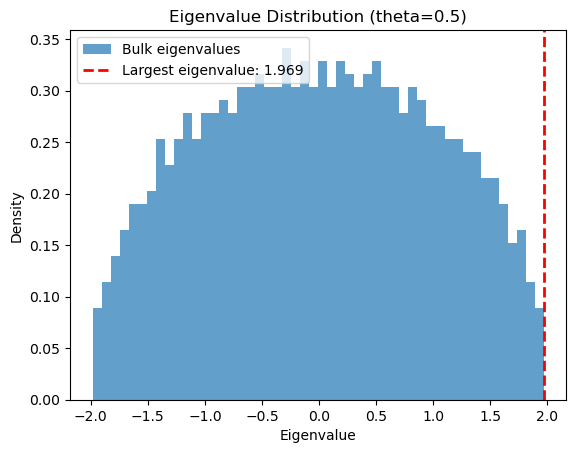

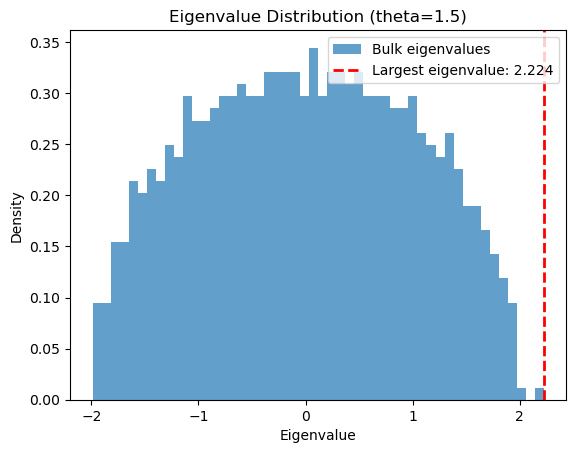

In [25]:
# Parameters
d = 1000             # Matrix size
theta_values = [0.5, 1.5]  # Try below and above the typical BBP threshold

# Plot eigenvalue distribution for different theta values
for theta in theta_values:
    plot_eigenvalue_distribution(d, theta)